In [1]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, MaxPool2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

In [16]:
path = "D://Project//model_6"
train_data = "data3//train"
test_data = "data3//test"

In [17]:
from glob import glob

In [18]:
glob("data//train//*//")

['data//train\\10\\',
 'data//train\\100\\',
 'data//train\\20\\',
 'data//train\\200\\',
 'data//train\\2000\\',
 'data//train\\50\\',
 'data//train\\500\\']

In [19]:
labels = ["10", "100", "20", "200", "2000", "50", "500"]

In [20]:
trainGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, horizontal_flip = True, zoom_range = 0.2)
testGen = ImageDataGenerator(rescale = 1./ 255)

In [21]:
train = trainGen.flow_from_directory(train_data, target_size = (img_height, img_width), classes = labels, class_mode = "categorical", batch_size = batch_size, shuffle = True)
test = testGen.flow_from_directory(test_data, target_size = (img_height, img_width), classes = labels, class_mode = "categorical", batch_size = batch_size, shuffle = True)

Found 1050 images belonging to 7 classes.
Found 175 images belonging to 7 classes.


In [22]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape = (img_height, img_width, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, 3, 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu"))

model.add(Flatten())

model.add(Dense(32, activation = "relu"))
model.add(Dense(7, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          1

In [24]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
epochs = 20

In [26]:
checkpoint_path = "checkpoint2//cp.ckpt"
checkpoint_dir = "checkpoint2"

In [27]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1)

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 10,  restore_best_weights = True)

In [29]:
model.fit(train, epochs = epochs, validation_data = test, callbacks = [early_stopping, cp_callback])

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 1.9321 - accuracy: 0.1486
Epoch 1: saving model to checkpoint2\cp.ckpt
33/33 [==============================] - 25s 723ms/step - loss: 1.9321 - accuracy: 0.1486 - val_loss: 1.8729 - val_accuracy: 0.2343
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 1.6646 - accuracy: 0.2952
Epoch 2: saving model to checkpoint2\cp.ckpt
33/33 [==============================] - 24s 724ms/step - loss: 1.6646 - accuracy: 0.2952 - val_loss: 1.3503 - val_accuracy: 0.3829
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 1.3092 - accuracy: 0.4352
Epoch 3: saving model to checkpoint2\cp.ckpt
33/33 [==============================] - 24s 720ms/step - loss: 1.3092 - accuracy: 0.4352 - val_loss: 0.9975 - val_accuracy: 0.6971
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.5829
Epoch 4: saving model to checkpoint2\cp.ckpt
33/33 [==============================] - 24s 730

In [30]:
import os
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [31]:
train_loss = model.history.history["loss"]
train_loss

[1.9320989847183228,
 1.664560317993164,
 1.3092389106750488,
 1.0716462135314941,
 0.7558180689811707,
 0.6037750840187073,
 0.5491011142730713,
 0.4557681381702423,
 0.41018277406692505,
 0.4477578401565552,
 0.3798619210720062,
 0.31895333528518677,
 0.31090518832206726,
 0.29937049746513367,
 0.23568350076675415,
 0.24419532716274261,
 0.29526716470718384,
 0.2537257671356201,
 0.2349046766757965,
 0.2503543794155121]

In [32]:
test_loss = model.history.history["val_loss"]
test_loss

[1.8729251623153687,
 1.3503211736679077,
 0.9974768161773682,
 0.7762822508811951,
 0.43076878786087036,
 0.3172246515750885,
 0.3618163764476776,
 0.22114314138889313,
 0.2165597379207611,
 0.20756743848323822,
 0.15682800114154816,
 0.20151373744010925,
 0.11939489841461182,
 0.13129091262817383,
 0.14327338337898254,
 0.11846313625574112,
 0.22392325103282928,
 0.12982390820980072,
 0.07180564105510712,
 0.07920059561729431]

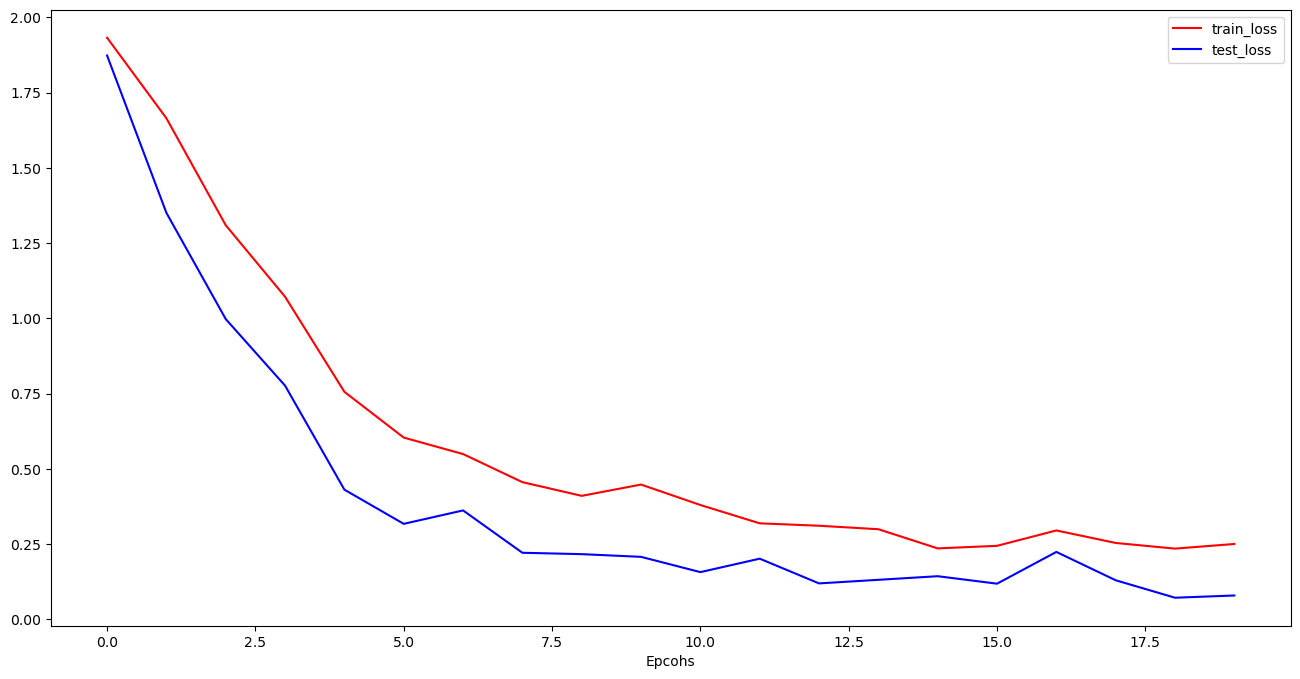

In [33]:
plt.figure(figsize = (16, 8))
plt.plot(np.arange(20), train_loss, color = 'red', label = "train_loss")
plt.plot(np.arange(20), test_loss, color = 'blue', label = "test_loss")
plt.legend()
plt.xlabel('Epcohs')
plt.show()

In [38]:
test_acc = model.history.history["val_accuracy"]
test_acc

[0.23428571224212646,
 0.38285714387893677,
 0.6971428394317627,
 0.7371428608894348,
 0.9200000166893005,
 0.9257143139839172,
 0.8514285683631897,
 0.9314285516738892,
 0.9314285516738892,
 0.9599999785423279,
 0.9657142758369446,
 0.9142857193946838,
 0.9599999785423279,
 0.9599999785423279,
 0.9314285516738892,
 0.954285740852356,
 0.8971428275108337,
 0.9485714435577393,
 0.9828571677207947,
 0.9714285731315613]

In [39]:
train_acc = model.history.history["accuracy"]
train_acc

[0.1485714316368103,
 0.29523810744285583,
 0.4352380931377411,
 0.5828571319580078,
 0.7209523916244507,
 0.7733333110809326,
 0.799047589302063,
 0.8285714387893677,
 0.8514285683631897,
 0.8333333134651184,
 0.8600000143051147,
 0.8742856979370117,
 0.8990476131439209,
 0.8952381014823914,
 0.915238082408905,
 0.9104762077331543,
 0.8942857384681702,
 0.9123809337615967,
 0.9247618913650513,
 0.9104762077331543]

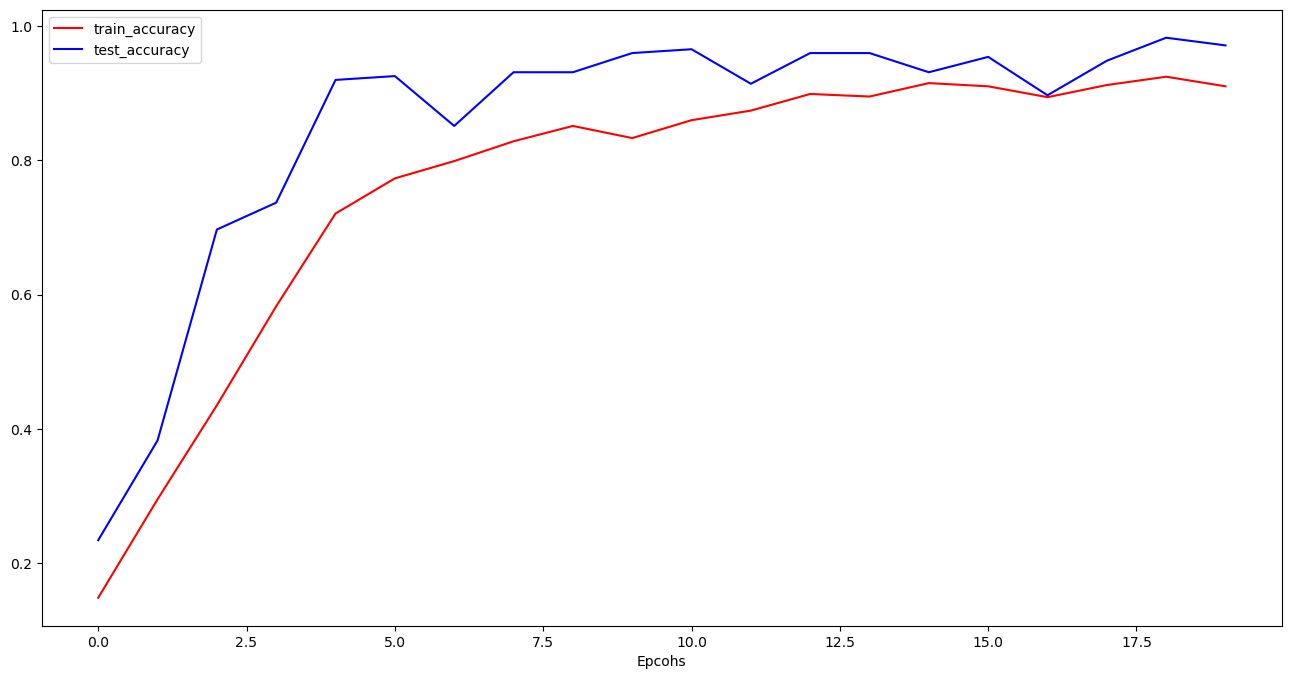

In [40]:
plt.figure(figsize = (16, 8))
plt.plot(np.arange(20), train_acc, color = 'red', label = "train_accuracy")
plt.plot(np.arange(20), test_acc, color = 'blue', label = "test_accuracy")
plt.legend()
plt.xlabel('Epcohs')
plt.show()

In [41]:
from keras.preprocessing import image

In [42]:
labels

['10', '100', '20', '200', '2000', '50', '500']

In [43]:
def predict_note(path):

    img_pred = image.load_img(path, target_size=(img_height, img_width))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred, axis=0)

    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    
    class_labels = ["10", "100", "20", "200", "2000", "50", "500"]
    
    prediction = class_labels[predicted_class_index]

    probability = predictions[0][predicted_class_index]

    print("Predicted Class:", prediction)
    print("Probability:", probability)


In [44]:
predict_note("data/test/10/343_sharp.png")

1/1 [==============================] - 0s 255ms/step
Predicted Class: 10
Probability: 1.0


In [45]:
predict_note("data/test/10/345.png")

1/1 [==============================] - 0s 39ms/step
Predicted Class: 10
Probability: 1.0


In [46]:
predict_note("data/test/20/252_sharp.png")

1/1 [==============================] - 0s 45ms/step
Predicted Class: 20
Probability: 1.0


In [47]:
predict_note("data/test/20/255.png")

1/1 [==============================] - 0s 49ms/step
Predicted Class: 20
Probability: 1.0


In [48]:
predict_note("data/test/50/203_sharp.png")

1/1 [==============================] - 0s 39ms/step
Predicted Class: 50
Probability: 1.0


In [49]:
predict_note("data/test/50/250_cb.png")

1/1 [==============================] - 0s 32ms/step
Predicted Class: 50
Probability: 1.0


In [50]:
predict_note("data/test/100/155.png")

1/1 [==============================] - 0s 40ms/step
Predicted Class: 100
Probability: 1.0


In [51]:
predict_note("data/test/100/194.png")

1/1 [==============================] - 0s 37ms/step
Predicted Class: 100
Probability: 1.0


In [52]:
predict_note("data/test/200/142_sharp.png")

1/1 [==============================] - 0s 39ms/step
Predicted Class: 200
Probability: 1.0


In [53]:
predict_note("data/test/200/150.png")

1/1 [==============================] - 0s 50ms/step
Predicted Class: 200
Probability: 1.0


In [54]:
predict_note("data/test/500/99_sharp.png")

1/1 [==============================] - 0s 38ms/step
Predicted Class: 500
Probability: 1.0


In [55]:
predict_note("data/test/500/96.png")

1/1 [==============================] - 0s 53ms/step
Predicted Class: 200
Probability: 1.0


In [56]:
predict_note("data/test/2000/47.png")

1/1 [==============================] - 0s 38ms/step
Predicted Class: 2000
Probability: 1.0


In [57]:
predict_note("data/test/2000/16.png")

1/1 [==============================] - 0s 36ms/step
Predicted Class: 2000
Probability: 1.0


In [42]:
from tensorflow.keras.models import load_model

In [58]:
model.save("new_cnn_model_saved")

INFO:tensorflow:Assets written to: new_cnn_model_saved\assets


INFO:tensorflow:Assets written to: new_cnn_model_saved\assets


In [59]:
model.save("new_cnn_model.h5")

In [60]:
new_model = model.load_weights(checkpoint_path)

In [61]:
predict_note("data/test/2000/16.png")

1/1 [==============================] - 0s 41ms/step
Predicted Class: 2000
Probability: 1.0


In [62]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)